In [1]:
%load_ext autoreload
%autoreload 2

In [395]:
%matplotlib inline
import math
import matplotlib
import pandas
import glob
import ast
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [3]:
from diameter_tools import get_trunk_diam

In [4]:
def load_data() -> pandas.DataFrame:
    a = glob.glob('data/*.csv')

    data = None
    l = []
    for f in a:
        dataset = pandas.read_csv(f)
        l.append(dataset)
    data = pandas.concat(l)
    return data

data = load_data()


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [5]:
data.set_index('id')


,Aktualność danych na dzień,GATUNEK_Scientific;OBWOD;SREDNICA_KORONY;O3;NO2;SO2;PM2.5,Jednostka zarządzająca,Nazwa polska,Nazwa łacińska,Numer inwentaryzacyjny,Obwód pnia w cm,Wysokość w m,gtype,height,id.1,imgurl,width,x,y
id,,,,,,,,,,,,,,,
AAKG9OAAnAAF1O1AAG,24.04.2012,NaN,Dzielnica Targówek,robinia sp.,Robinia sp.,D253003,98,14,2001.0,3.0,AAKG9OAAnAAF1O1AAG,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3.0,7.503078e+06,5.792584e+06
AAKG9OAAnAAF1O1AAI,24.04.2012,NaN,Dzielnica Targówek,robinia sp.,Robinia sp.,D253005,"17, 9, 8, 10, 11",5,2001.0,1.0,AAKG9OAAnAAF1O1AAI,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1.0,7.503081e+06,5.792579e+06
AAKG9OAAnAAF1O1AAK,24.04.2012,NaN,Dzielnica Targówek,robinia sp.,Robinia sp.,D253007,20,5,2001.0,1.0,AAKG9OAAnAAF1O1AAK,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1.0,7.503081e+06,5.792575e+06
AAKG9OAAnAAF1O1AAJ,24.04.2012,NaN,Dzielnica Targówek,robinia sp.,Robinia sp.,D253006,30,4.5,2001.0,1.0,AAKG9OAAnAAF1O1AAJ,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1.0,7.503083e+06,5.792575e+06
AAKG9OAAnAAF1O1AAH,24.04.2012,NaN,Dzielnica Targówek,robinia sp.,Robinia sp.,D253004,"120, 10, 11, 8",14,2001.0,3.0,AAKG9OAAnAAF1O1AAH,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3.0,7.503084e+06,5.792577e+06
AAKG9OAAnAAF1OUAAW,24.04.2012,NaN,Dzielnica Targówek,klon jesionolistny,Acer negundo,D253784,"79, 53, 36",10,2001.0,2.0,AAKG9OAAnAAF1OUAAW,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,2.0,7.503096e+06,5.792572e+06
AAKG9OAAnAAF1OUAAV,24.04.2012,NaN,Dzielnica Targówek,klon jesionolistny,Acer negundo,D253783,95,12,2001.0,3.0,AAKG9OAAnAAF1OUAAV,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3.0,7.503097e+06,5.792573e+06
AAKG9OAAnAAF1OUAAX,24.04.2012,NaN,Dzielnica Targówek,topola czarna,Populus nigra,D253785,286,17,2001.0,3.0,AAKG9OAAnAAF1OUAAX,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3.0,7.503106e+06,5.792588e+06
AAKG9OAAnAAF1OUAAY,24.04.2012,NaN,Dzielnica Targówek,klon jesionolistny,Acer negundo,D253786,"55, 35",7,2001.0,2.0,AAKG9OAAnAAF1OUAAY,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,2.0,7.503117e+06,5.792612e+06


In [6]:
data['Obwód pnia w cm'].isna().sum()

9064

In [7]:
data['Wysokość w m'].isna().sum()

16496

In [8]:
def get_species_list(data: pandas.DataFrame) -> pandas.DataFrame:
    sp = pandas.DataFrame()
    sp['Nazwa łacińska'] = data['Nazwa łacińska']
    sp['Nazwa polska'] = data['Nazwa polska']
    species_unique = sp.drop_duplicates()
    return species_unique

species_unique = get_species_list(data)


In [9]:
data['norm'] = data['Obwód pnia w cm'].fillna('0')
data.dropna(subset=['Obwód pnia w cm', 'norm',], inplace=True)
data['norm'] = data['norm'].apply(pandas.Series)

In [10]:
data['normalized_trunk_diam'] = data['norm'].apply(get_trunk_diam)
data['normalized_trunk_diam'] = data['normalized_trunk_diam'] / 100

34 malformed node or string: 34 <class 'int'>
32 malformed node or string: 32 <class 'int'>
38 malformed node or string: 38 <class 'int'>
8 malformed node or string: 8 <class 'int'>
40 malformed node or string: 40 <class 'int'>
50 malformed node or string: 50 <class 'int'>
61 malformed node or string: 61 <class 'int'>
36 malformed node or string: 36 <class 'int'>
54 malformed node or string: 54 <class 'int'>
67 malformed node or string: 67 <class 'int'>
63 malformed node or string: 63 <class 'int'>
57.0 malformed node or string: 57.0 <class 'float'>


In [11]:
data['height'] = data['Wysokość w m'].fillna('0')
data['height'] = data['height'].str.replace(',', '.')
data['height'] = data['height'].astype(np.float)

In [12]:
df2 = data[['height', 'normalized_trunk_diam']]

In [13]:
df2.dropna(inplace=True)

/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26237 entries, 0 to 2287
Data columns (total 2 columns):
height                   26237 non-null float64
normalized_trunk_diam    26237 non-null float64
dtypes: float64(2)
memory usage: 614.9 KB


In [15]:
df2.head()

,height,normalized_trunk_diam
0,25.0,1.209578
1,6.5,0.187803
2,7.5,0.286479
3,5.0,0.168704
4,26.0,0.993127


In [16]:
df2.corr()

,height,normalized_trunk_diam
height,1.000000,0.325102
normalized_trunk_diam,0.325102,1.000000


In [17]:
df2.describe()

,height,normalized_trunk_diam
count,26237.000000,26237.000000
mean,5.841072,0.207773
std,12.874934,0.187604
min,0.000000,0.000000
25%,0.000000,0.082761
50%,4.000000,0.143239
75%,9.000000,0.280113
max,1402.000000,4.946536


Text(0.5, 1.0, 'Wykres wysokości drzew od średnicy pni')

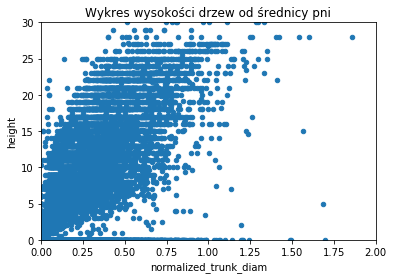

In [18]:
df2.plot(kind='scatter', x='normalized_trunk_diam', y='height', ylim=(0, 30), xlim=(0, 2))
plt.title('Wykres wysokości drzew od średnicy pni')

In [19]:
data.columns

Index(['Aktualność danych na dzień',
       'GATUNEK_Scientific;OBWOD;SREDNICA_KORONY;O3;NO2;SO2;PM2.5',
       'Jednostka zarządzająca', 'Nazwa polska', 'Nazwa łacińska',
       'Numer inwentaryzacyjny', 'Obwód pnia w cm', 'Wysokość w m', 'gtype',
       'height', 'id', 'id.1', 'imgurl', 'width', 'x', 'y', 'norm',
       'normalized_trunk_diam'],
      dtype='object')

In [20]:
COLUMNS = ['SREDNICA_KORONY', 'OBWOD', 'O3', 'NO2', 'SO2', 'PM2.5', ]

trees = pandas.read_csv('data/trees.csv', sep=';')


In [21]:
trees.describe()

,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5
count,6561.000000,6561.000000,6552.000000,6552.000000,6552.000000,6552.000000
mean,86.275415,3.915303,151.431181,88.133532,10.511538,7.938523
std,75.666527,2.303517,127.897838,74.448851,8.840640,6.789392
min,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,36.900000,19.800000,2.800000,2.800000
50%,82.000000,4.000000,136.100000,79.400000,8.500000,8.500000
75%,123.000000,5.000000,226.800000,130.400000,17.000000,11.300000
max,2222.000000,44.000000,932.700000,544.300000,65.200000,48.200000


In [22]:
o3 = trees[['OBWOD', 'O3']]

o3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6561 entries, 0 to 6560
Data columns (total 2 columns):
OBWOD    6561 non-null int64
O3       6552 non-null float64
dtypes: float64(1), int64(1)
memory usage: 102.6 KB


In [24]:
from sklearn import metrics

In [25]:
trees.dropna(inplace=True)
metrics.r2_score(trees['O3'], trees['NO2'])

0.5802898649405516

In [26]:
trees.corr()

,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5
OBWOD,1.000000,0.712441,0.904681,0.904630,0.899551,0.898481
SREDNICA_KORONY,0.712441,1.000000,0.757916,0.757825,0.751689,0.753292
O3,0.904681,0.757916,1.000000,0.999918,0.995736,0.991805
NO2,0.904630,0.757825,0.999918,1.000000,0.995689,0.991876
SO2,0.899551,0.751689,0.995736,0.995689,1.000000,0.987561
PM2.5,0.898481,0.753292,0.991805,0.991876,0.987561,1.000000


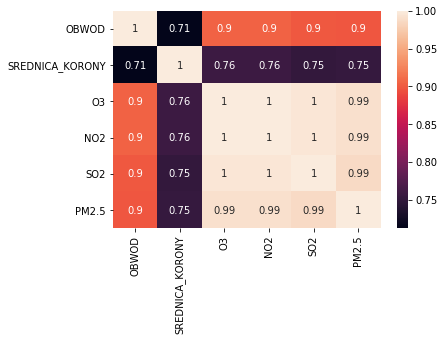

In [27]:
sns.heatmap(trees.corr(), annot=True)

In [28]:
le = preprocessing.LabelEncoder()
le.fit(trees['GATUNEK_Scientific'])


LabelEncoder()

In [29]:
le.classes_
transformed = le.transform(trees['GATUNEK_Scientific'])

In [30]:
trees['SPECIES'] = transformed

In [31]:
trees.head()

,GATUNEK_Scientific,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5,SPECIES
0,Populus alba,14,2.0,5.7,2.8,0.0,0.0,42
1,Populus tremula,17,3.0,8.5,2.8,0.0,0.0,46
2,Tilia cordata,10,1.0,0.0,0.0,0.0,0.0,73
3,Tilia cordata,10,4.0,0.0,0.0,0.0,0.0,73
4,Tilia cordata,10,5.0,0.0,0.0,0.0,0.0,73


In [32]:
trees['SPECIES'].unique()

array([42, 46, 73, 76, 74,  2, 24,  3,  4, 38, 13, 58, 40, 14, 18,  9, 36,
       22, 43, 44, 45, 35, 30, 19, 61, 72,  6, 20, 52, 55, 29, 32, 75, 77,
       68, 25,  8,  1, 63, 59,  5, 71, 47, 41, 60, 62, 69, 49, 51, 27, 26,
       17,  7, 31,  0, 21, 12, 34, 11, 56, 48, 28, 67, 64, 70, 57, 50, 54,
       23, 33, 53, 10, 66, 16, 65, 39, 15, 37])

In [33]:
top = trees.SPECIES.value_counts()
top.sort_values(ascending=False, inplace=True)
tops = list(top[:5].index)


In [34]:
lim = 10
y = data['Nazwa łacińska'].value_counts().values[:lim]
x = data['Nazwa łacińska'].value_counts().index[:lim]

[Text(0, 0, 'Acer platanoides'),
 Text(0, 0, 'Tilia cordata'),
 Text(0, 0, 'Acer negundo'),
 Text(0, 0, 'Betula pendula'),
 Text(0, 0, 'Acer saccharinum'),
 Text(0, 0, 'Tilia platyphyllos'),
 Text(0, 0, 'Fraxinus excelsior'),
 Text(0, 0, 'Quercus robur'),
 Text(0, 0, 'Robinia pseudoacacia'),
 Text(0, 0, 'Acer pseudoplatanus')]

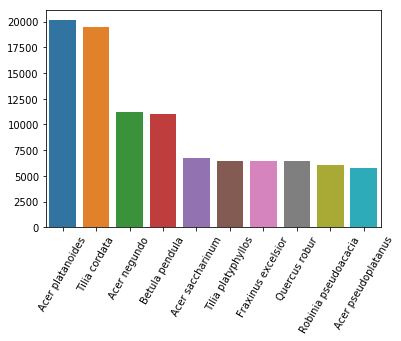

In [35]:
ax = sns.barplot(x=x, y=y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

In [36]:
le.inverse_transform(tops)

array(['Tilia cordata', 'Acer platanoides', 'Fraxinus pennsylvanica',
       'Quercus robur', 'Tilia  sp.'], dtype=object)

(0, 800.0)

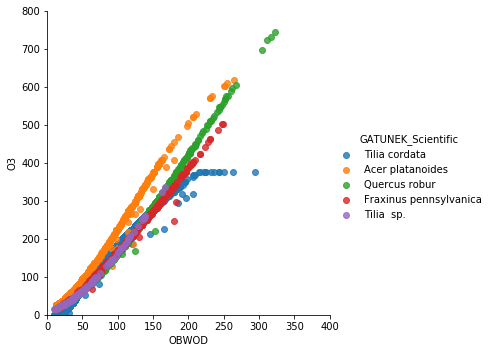

In [37]:
sns.lmplot(data=trees[trees['SPECIES'].isin(tops)], x='OBWOD', y='O3', hue='GATUNEK_Scientific', fit_reg=False, legend=True)
plt.xlim(0, 400.0)
plt.ylim(0, 800.0)

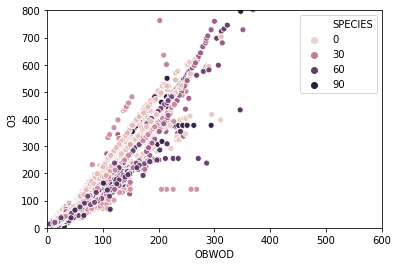

In [38]:
sns.scatterplot(data=trees, x='OBWOD', y='O3', hue='SPECIES')
plt.xlim(0, 600.0)
plt.ylim(0, 800.0)
plt.legend()

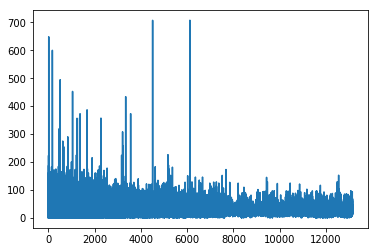

In [40]:
data['trunk_diam_cm'] = data['normalized_trunk_diam'] * 100
plt.plot(data['trunk_diam_cm'])

In [ ]:
data['trunk_diam_cm'].describe()

In [ ]:
gatunki = pandas.read_csv('gatunki_warszawa_typ.csv')


In [ ]:
gatunki['Nazwa lacinska'].sort_values().unique()

In [ ]:
trees['GATUNEK_Scientific'].sort_values().unique()

In [ ]:
len(data['Nazwa łacińska'].sort_values().unique())

In [ ]:


COLUMNS = ['SREDNICA_KORONY', 'OBWOD', 'O3', 'NO2', 'SO2', 'PM2.5', ]
SUBS_TYPE = COLUMNS[2:]



def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [ ]:
trees.head()

In [ ]:
trees.describe()

In [ ]:
sns.distplot(trees['OBWOD'], kde=False, bins=100)

In [ ]:
trees = trees[trees['OBWOD'] < 300]

In [ ]:
trees.describe()

In [ ]:
data[['Nazwa łacińska', 'normalized_trunk_diam']].head()

In [170]:
trees.dropna(inplace=True)
trees = trees[trees['OBWOD'] < 300]
trees = trees[trees['SREDNICA_KORONY'] < 20]
metrics.r2_score(trees['O3'], trees['NO2'])
trees['KORONA_NORM'] = trees['SREDNICA_KORONY'] * 100
trees['OBWOD_KW'] = trees['OBWOD'] ** 2
trees['OBWOD_SQ'] = np.sqrt(trees['OBWOD'])
trees['OBWOD_LOG'] = np.sqrt(trees['OBWOD'])

In [55]:
# Przewidywanie średnicy korony
x_train, x_validation, y_train, y_validation = train_test_split(
    trees[['OBWOD', 'OBWOD_KW']],
    trees['SREDNICA_KORONY'],
    test_size=0.25,
)

regression = LinearRegression()
regression.fit(
    x_train,
    y_train,
)

print(mean_absolute_percentage_error(y_train, regression.predict(x_train)))
print(r2_score(y_train, regression.predict(x_train)))

25.526621167871895
0.7077621779501748


In [329]:
def get_regression(trees_df, features):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[features],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    m_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    
    r2 = r2_score(y_validation, reg.predict(x_validation))
    return (reg, m_abs_err, r2)


feature_candidates = [
    ['OBWOD'],
    ['KORONA_NORM', 'OBWOD'],
    ['OBWOD', 'OBWOD_SQ'],
    ['OBWOD', 'OBWOD_KW'],
    ['OBWOD', 'OBWOD_LOG'],
    ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM'],
]

ntimes = 50
for features in feature_candidates:
    agg_m_abs_err = 0
    for a in range(ntimes):
        (r, m_abs_err, r2) = get_regression(trees, features)
        # print(m_abs_err, r2)
        agg_m_abs_err += m_abs_err
    print(f'#### Average mean abs err: {agg_m_abs_err / ntimes} {features}')


#### Average mean abs err: 20.001345306570173 ['OBWOD']
#### Average mean abs err: 20.18903166797894 ['KORONA_NORM', 'OBWOD']
#### Average mean abs err: 19.346001415414126 ['OBWOD', 'OBWOD_SQ']
#### Average mean abs err: 19.602860816441062 ['OBWOD', 'OBWOD_KW']
#### Average mean abs err: 19.2938408726715 ['OBWOD', 'OBWOD_LOG']
#### Average mean abs err: 19.27317925079803 ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']


In [394]:
def get_regression(trees_df, features):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[features],
        trees_df['O3'],
        test_size=0.2,
    )
    reg = HuberRegressor()
    reg.fit(
        x_train,
        y_train,
    )
    m_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    
    r2 = r2_score(y_validation, reg.predict(x_validation))
    return (reg, m_abs_err, r2)


feature_candidates = [
    ['OBWOD'],
    ['KORONA_NORM', 'OBWOD'],
    ['OBWOD', 'OBWOD_SQ'],
    ['OBWOD', 'OBWOD_KW'],
    ['OBWOD', 'OBWOD_LOG'],
    ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM'],
]

ntimes = 50
for features in feature_candidates:
    agg_m_abs_err = 0
    agg_r2 = 0
    for a in range(ntimes):
        (r, m_abs_err, r2) = get_regression(trees, features)
        # print(m_abs_err, r2)
        agg_m_abs_err += m_abs_err
        agg_r2 += r2
    print(f'#### Mean: {agg_m_abs_err / ntimes}, R2: {agg_r2 / ntimes} {features}')
    # print(f'#### Average r2: {agg_r2 / ntimes} {features}')


#### Mean: 19.91504213804492, R2: 0.9278350732055425 ['OBWOD']
#### Mean: 19.960933761866496, R2: 0.929734905341522 ['KORONA_NORM', 'OBWOD']
#### Mean: 19.228983888752257, R2: 0.9302716038182307 ['OBWOD', 'OBWOD_SQ']
#### Mean: 19.628716710883392, R2: 0.9247822990652372 ['OBWOD', 'OBWOD_KW']
#### Mean: 19.197868920448297, R2: 0.9298394620514147 ['OBWOD', 'OBWOD_LOG']
#### Mean: 19.087061770444535, R2: 0.9333106499984448 ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']


In [390]:
from sklearn import linear_model
import xgboost

def get_regression(trees_df, features):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[features],
        trees_df['O3'],
        test_size=0.2,
    )
    xgdmat = xgboost.DMatrix(x_train, y_train)
    params = {'objective': 'reg:linear'}
    final_gb = xgboost.train(params, xgdmat)
    testdmat = xgboost.DMatrix(x_validation)
    y_pred = final_gb.predict(testdmat)

    m_abs_err = mean_absolute_error(y_validation, y_pred)
    
    r2 = r2_score(y_validation, y_pred)
    return (_, m_abs_err, r2)


feature_candidates = [
    ['OBWOD'],
    ['KORONA_NORM', 'OBWOD'],
    ['OBWOD', 'OBWOD_SQ'],
    ['OBWOD', 'OBWOD_KW'],
    ['OBWOD', 'OBWOD_LOG'],
    ['OBWOD', 'OBWOD_LOG', 'KORONA_NORM'],
]

ntimes = 20
m_abs_err = -1
r2 = -1

for features in feature_candidates:
    agg_m_abs_err = 0
    agg_r2 = 0
    for a in range(ntimes):
        (r, m_abs_err, r2) = get_regression(trees, features)
        # print(m_abs_err, r2)
        agg_m_abs_err += m_abs_err
        agg_r2 += r2
    print(f'#### Mean: {agg_m_abs_err / ntimes}, R2: {agg_r2 / ntimes} {features}')
    # print(f'#### Average r2: {agg_r2 / ntimes} {features}')


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

#### Mean: 19.616586339956417, R2: 0.9213434481539065 ['OBWOD']


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

#### Mean: 19.465840857876408, R2: 0.92643967431863 ['KORONA_NORM', 'OBWOD']


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

#### Mean: 19.71417449686425, R2: 0.9225602167257474 ['OBWOD', 'OBWOD_SQ']


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

#### Mean: 19.667371239940085, R2: 0.921114988534246 ['OBWOD', 'OBWOD_KW']


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

#### Mean: 19.795955946811134, R2: 0.9219108177389235 ['OBWOD', 'OBWOD_LOG']


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

#### Mean: 19.699370897375733, R2: 0.9234248673377236 ['OBWOD', 'OBWOD_LOG', 'KORONA_NORM']


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


20.34806768498594
0.9319225763516583


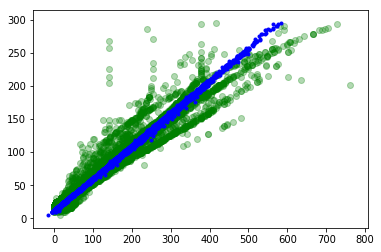

In [175]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['KORONA_NORM', 'OBWOD']],
        trees_df['O3'],
        test_size=0.2,
    )
    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    msqe = mean_absolute_error(y_train, reg.predict(x_train))
    print(msqe)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg_o3 = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['KORONA_NORM'] + a2 * trees['OBWOD'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


19.873037993862965
0.9316713061089987


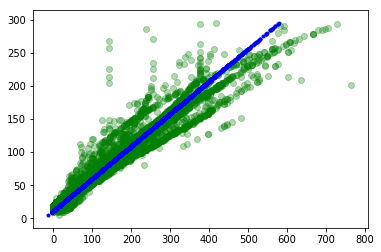

In [313]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    msqe = mean_absolute_error(y_train, reg.predict(x_train))
    print(msqe)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg_o3 = get_reg(trees)

a, b = reg_o3.coef_[0], reg_o3.intercept_

fn = a * trees['OBWOD'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


In [155]:
y = trees[['O3']].fillna(0.0)
x = pandas.concat([pandas.get_dummies(trees['SPECIES']), trees[['OBWOD']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(trees[['OBWOD']], y, test_size=0.25)

lr = LinearRegression()

results = {}


metric = 'O3'

lr.fit(x_train, np.array(y_train[metric]))

R_2 = int(round(lr.score(x_test, y_test[metric]), 2) * 100)

mape = mean_absolute_percentage_error(y_test[metric], lr.predict(x_test))

msqe = mean_squared_error(y_test[metric], lr.predict(x_test))

print(f'Przy estymacji {metric} R^2 wynosi {R_2}%, a średni procentowy błąd - {mape}')

print(f'Parametry modelu: {lr.coef_, lr.intercept_} - odpowiednio obwód, średnica korony, i wyraz wolny')
print('*' * 100)
pred = lr.predict(np.array([[127.0, ]]))
results[metric] = pred
print(results)

Przy estymacji O3 R^2 wynosi 93%, a średni procentowy błąd - inf
Parametry modelu: (array([2.04451103]), -23.01002020717354) - odpowiednio obwód, średnica korony, i wyraz wolny
****************************************************************************************************
{'O3': array([236.64288112])}


19.438606654352885
0.9196608540568805


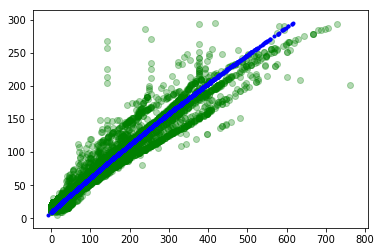

In [294]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_KW']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))
    return reg

reg_o3 = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_KW'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


19.029027027710516
0.9241785591598763


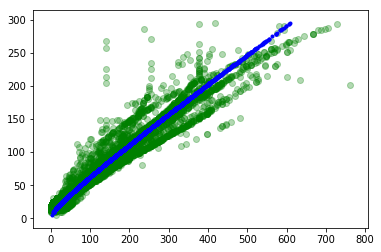

In [167]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg_o3 = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


19.28837991984166
0.9421566654503718


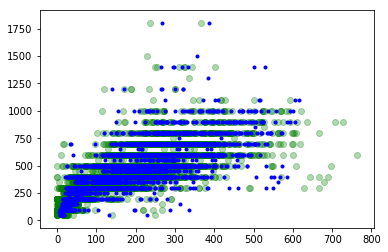

In [281]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    return reg

reg_o3 = get_reg(trees)

a1, a2, a3, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.coef_[2], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + a3 * trees['KORONA_NORM'] + b

plt.plot(fn, trees['KORONA_NORM'], 'b.')
plt.scatter(trees['O3'], trees['KORONA_NORM'], c='g', alpha=0.3)


19.083532809916925
0.9210888465464658


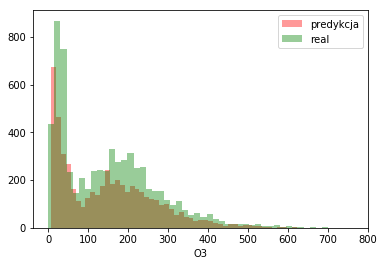

In [418]:
# trzy-ficzerowa

def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    return reg, x_train

reg_o3, x_train = get_reg(trees)

a1, a2, a3, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.coef_[2], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + a3 * trees['KORONA_NORM'] + b

sns.distplot(reg_o3.predict(x_train), kde=False, bins=50, color='r', label='predykcja')
sns.distplot(trees['O3'], kde=False, bins=50, color='g', label='real')
plt.legend()


MErr: 18.974367365942115
R2:   0.9272785471625989


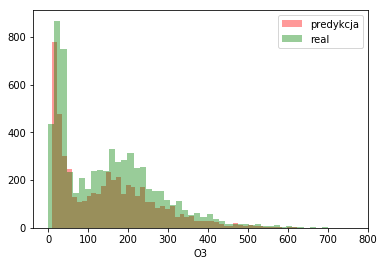

In [419]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = HuberRegressor()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(f'MErr: {mean_abs_err}')
    
    print(f'R2:   {r2_score(y_validation, reg.predict(x_validation))}')
    return reg, x_train

reg_o3, x_train = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + b

sns.distplot(reg_o3.predict(x_train), kde=False, bins=50, color='r', label='predykcja')
sns.distplot(trees['O3'], kde=False, bins=50, color='g', label='real')
plt.legend()
